# Assignment: Trees
Zoe Gates, gzp2eu
Do three questions.

**Q1.** Please answer the following questions in your own words.

1. How are trees constructed?

The decision tree is constructed exactly like a flow chart. There are different boxes of criteria, made up of statistical relationships, that connect to each other by different decisions/paths. The model makes decision based on the characteristics of the observed samples and the establihsed statistical .
 
3. How do trees handle non-linear relationships between variables? Compare this to linear models. 

Trees split data into hierarchical decisions which allows non-linear relationships to be properly handled. Linear models require feature transformation in order to regress data in a straight-line relationship.

4. Why is the Gini a good loss function for categorical target variables?

Gini measures the purity of a "node" or the outputs of a decision fork. It is a measure of homogeneity, which is what we are aiming for with a CART. It's also an efficient function. 

5. Why do trees tend to overfit, and how can this tendency be constrained?

The trees are minimizing impurities; therefore, they can keep on trickling down the nodes until each single observation is differentiated somehow from the next. Because of this, the trees need to be limited in some capacity. This tendency can be constrained by limiting the depth on the trees, or the length of it from hte inputted data to the classified outputs. A lower bound on impurity can be imposed, so that the model doesn't keep on separating data beyond the wanted level of classification. It is also possible to impose a minimum limit on the number of observations in the terminal nodes.

7. True or false, and explain: Trees only really perform well in situations with lots of categorical variables as features/covariates.

False, decision trees work well with continuous variables as well. When handling this data, the trees establish optimal thresholds (ex. ">3 months?"). This is very helpful in navigating non-linear relationships between continuous variables!

9. Why don't most versions of classification/regression tree concept allow for more than two branches after a split?

The binary split is done for many reasons including efficiency, proper fitting, and simplicity. Giving the tree the option to split more than two ways at once can lead to overfitting. Additionally, splits more than two ways can be shown in the next step of the tree.

11. What are some heuristic ways you can examine a tree and decide whether it is probably over- or under-fitting?

Overfitting would result in a very large tree with lots of splits and highly specific criteria for the splits. This may mean the tree is sensitive to each small variation in the data and is too specific. On the contrary, underfitting can be noticed if the tree has little depth, a lot of data at each node, and overly simple criteria.

**Q2.** This is a case study on regression and classification trees.

1. Load `./data/cars_hw.csv`. How many observations and features/covariates/variables? What are the available variables? Take a look at the first few rows of data.

2. For the categorical variables `Make`, `Color`, `Body_type`, `No_of_Owners`, `Fuel_Type`, `Transmission`, and `Transmission_Type`, create dummy/one-hot-encoded representations. For numeric variables, we'll use `Mileage_Run`, `Make_Year`, and `Seating_Capacity`. Our target variable will be `Price`. Make a train-test split of your data.

3. From `sklearn.tree`, import the `DecisionTreeRegressor` and `plot_tree`. Use a train-test split to iterate over possible values for `min_samples_leaf`, computing the $R^2$ for each value between 1 and 25. What choice achieves the highest $R^2$ on the test data?

4. For the optimal `min_samples_leaf` from 3, regress price on the rest of the features/covariates using the training data. What is your $R^2$ and RMSE on the test set? Plot the dendrogram. Plot the residuals. Is the density of residuals symmetric and centered around 0?

4. Run a linear regression of price on the same variables. Which model -- regression tree or linear regression -- performs better on the test set? Why?

5. Predict prices using both your tree and your linear model, and make a scatter plot of their values. Describe what you see. 

In [4]:
#Importing necessary packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
#1
cars= pd.read_csv("https://raw.githubusercontent.com/gatesz33/trees/refs/heads/main/assignment/data/cars_hw.csv")

In [6]:
cars.describe()
#976 observations

,Unnamed: 0,Make_Year,Mileage_Run,Seating_Capacity,Price
count,976.000000,976.000000,976.000000,976.000000,9.760000e+02
mean,488.500000,2016.963115,41571.195697,5.095287,7.410195e+05
std,281.891232,2.818742,24390.995134,0.446224,3.673234e+05
min,1.000000,2011.000000,1117.000000,4.000000,1.880000e+05
25%,244.750000,2015.000000,22676.750000,5.000000,4.757500e+05
50%,488.500000,2017.000000,37570.500000,5.000000,6.665000e+05
75%,732.250000,2019.000000,57421.250000,5.000000,8.830000e+05
max,976.000000,2022.000000,99495.000000,8.000000,2.941000e+06


In [7]:
print(cars.shape) #Checking the shape of the dataset
#12 covariates

(976, 12)


In [8]:
cars.head(10) #Checking the first ten rows of the dataset

,Unnamed: 0,Make,Make_Year,Color,Body_Type,Mileage_Run,No_of_Owners,Seating_Capacity,Fuel_Type,Transmission,Transmission_Type,Price
0,1,Volkswagen,2017,silver,sedan,44611,1st,5,diesel,7-Speed,Automatic,657000
1,2,Hyundai,2016,red,crossover,20305,1st,5,petrol,5-Speed,Manual,682000
2,3,Honda,2019,white,suv,29540,2nd,5,petrol,5-Speed,Manual,793000
3,4,Renault,2017,bronze,hatchback,35680,1st,5,petrol,5-Speed,Manual,414000
4,5,Hyundai,2017,orange,hatchback,25126,1st,5,petrol,5-Speed,Manual,515000
5,6,Hyundai,2016,red,hatchback,52261,1st,5,petrol,5-Speed,Manual,604000
6,7,Honda,2012,grey,hatchback,28108,2nd,5,petrol,5-Speed,Manual,316000
7,8,Tata,2019,grey,suv,92603,1st,5,diesel,6-Speed,Automatic,1419000
8,9,Hyundai,2021,blue,hatchback,16304,1st,5,petrol,5-Speed,Manual,710000
9,10,Renault,2019,bronze,hatchback,26350,2nd,5,petrol,5-Speed,Manual,392000


In [9]:
#The variables are make, year, color, body type, mileage, number of owners, seating capcity, fuel type, transmission, transmission type, and price.

In [10]:
from sklearn.model_selection import train_test_split #Importing train_test_split

In [11]:
cars_oh = pd.get_dummies(cars, columns=['Make','Color','Body_Type','No_of_Owners','Fuel_Type', 'Transmission','Transmission_Type'], drop_first=False) #One-hot-encoding the categorical car data in order to use models

In [12]:
cars_oh #Veryifying that this was successful

,Unnamed: 0,Make_Year,Mileage_Run,Seating_Capacity,Price,Make_Chevrolet,Make_Datsun,Make_Ford,Make_Honda,Make_Hyundai,...,Fuel_Type_diesel,Fuel_Type_petrol,Fuel_Type_petrol+cng,Transmission_4-Speed,Transmission_5-Speed,Transmission_6-Speed,Transmission_7-Speed,Transmission_CVT,Transmission_Type_Automatic,Transmission_Type_Manual
0,1,2017,44611,5,657000,False,False,False,False,False,...,True,False,False,False,False,False,True,False,True,False
1,2,2016,20305,5,682000,False,False,False,False,True,...,False,True,False,False,True,False,False,False,False,True
2,3,2019,29540,5,793000,False,False,False,True,False,...,False,True,False,False,True,False,False,False,False,True
3,4,2017,35680,5,414000,False,False,False,False,False,...,False,True,False,False,True,False,False,False,False,True
4,5,2017,25126,5,515000,False,False,False,False,True,...,False,True,False,False,True,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
971,972,2018,23869,5,956000,False,False,False,False,True,...,False,True,False,False,False,True,False,False,True,False
972,973,2019,14831,5,1027000,False,False,False,False,True,...,False,True,False,False,False,True,False,False,True,False
973,974,2014,52846,5,736000,False,False,False,False,True,...,False,True,False,True,False,False,False,False,True,False
974,975,2020,28335,5,749000,False,False,True,False,False,...,True,False,False,False,True,False,False,False,True,False


In [13]:
y = cars_oh['Price'] #Defining y variable as Price
X = cars_oh.drop(['Price'], axis=1) #Defining x variables as everything but Price

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.2,random_state=96) #Train test splitting the data (test data is 20 percent of data)

In [15]:
from sklearn.tree import DecisionTreeRegressor #Importing necessary tools from Sci-Kit for decision tree and R^2 score
from sklearn.tree import plot_tree
from sklearn.metrics import r2_score

In [16]:
for leaf in range(1, 26): #Iterating 25 times over the possible number of leaves in each ending group
    model = DecisionTreeRegressor(min_samples_leaf=leaf, random_state=96)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    score = r2_score(y_test, y_pred)
    print(f"min_samples_leaf = {leaf}, R Squared = {score:.4f}") #Printing the R^2 score for the model at each R^2

min_samples_leaf = 1, R Squared = 0.7830
min_samples_leaf = 2, R Squared = 0.7537
min_samples_leaf = 3, R Squared = 0.7455
min_samples_leaf = 4, R Squared = 0.7688
min_samples_leaf = 5, R Squared = 0.7736
min_samples_leaf = 6, R Squared = 0.7552
min_samples_leaf = 7, R Squared = 0.7647
min_samples_leaf = 8, R Squared = 0.7616
min_samples_leaf = 9, R Squared = 0.7468
min_samples_leaf = 10, R Squared = 0.7458
min_samples_leaf = 11, R Squared = 0.7359
min_samples_leaf = 12, R Squared = 0.7121
min_samples_leaf = 13, R Squared = 0.7087
min_samples_leaf = 14, R Squared = 0.7068
min_samples_leaf = 15, R Squared = 0.7114
min_samples_leaf = 16, R Squared = 0.7117
min_samples_leaf = 17, R Squared = 0.6904
min_samples_leaf = 18, R Squared = 0.7150
min_samples_leaf = 19, R Squared = 0.7071
min_samples_leaf = 20, R Squared = 0.7077
min_samples_leaf = 21, R Squared = 0.7080
min_samples_leaf = 22, R Squared = 0.7121
min_samples_leaf = 23, R Squared = 0.7147
min_samples_leaf = 24, R Squared = 0.7144
m

The highest R^2 (a desired outcome), is achieved by 1 sample leaf (so one data point at the end of each row). This makes sense because it would most closely fit the given data, but this risks overfitting and memorizing noise that would result in inaccurate predictions on other data. As a result, I would use 5 sample leaves, the R^2 doesn't differ by much from 1 and it is a happy medium.

In [18]:
from sklearn.metrics import mean_squared_error #Importing a tool from Sci-Kit

model_tree = DecisionTreeRegressor(min_samples_leaf=5, random_state=96) #Defining the tree model with our selected number of leaves
model_tree.fit(X_train, y_train) #Fitting the tree on our training data
tree_ypred = model_tree.predict(X_test) #Predicting the prices based on the test covariates
treer2 = r2_score(y_test, tree_ypred) #Calculating the R^2 score to check the performance of our model
treermse = np.sqrt(mean_squared_error(y_test, tree_ypred)) #Checking the tree rmse to see error

print(treer2)
print(treermse)

0.7736154332866624
188750.40511672868


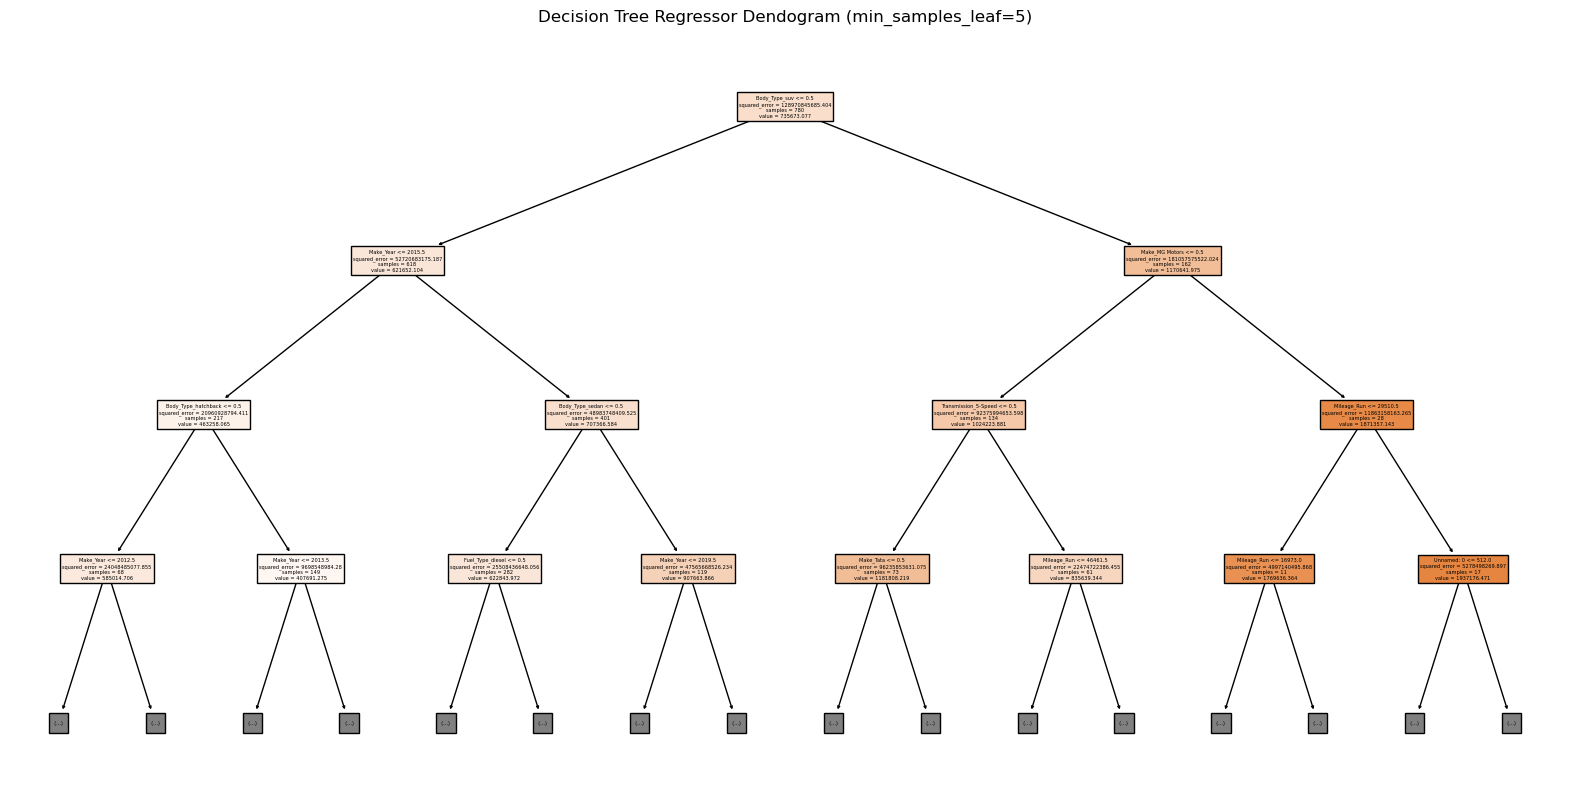

In [19]:
plt.figure(figsize=(20,10)) #Establishing the figure size
plot_tree(model_tree, feature_names=X.columns, filled=True, max_depth=3) #Plotting the dendogram
plt.title("Decision Tree Regressor Dendogram (min_samples_leaf=5)") #Adding a title
plt.show()

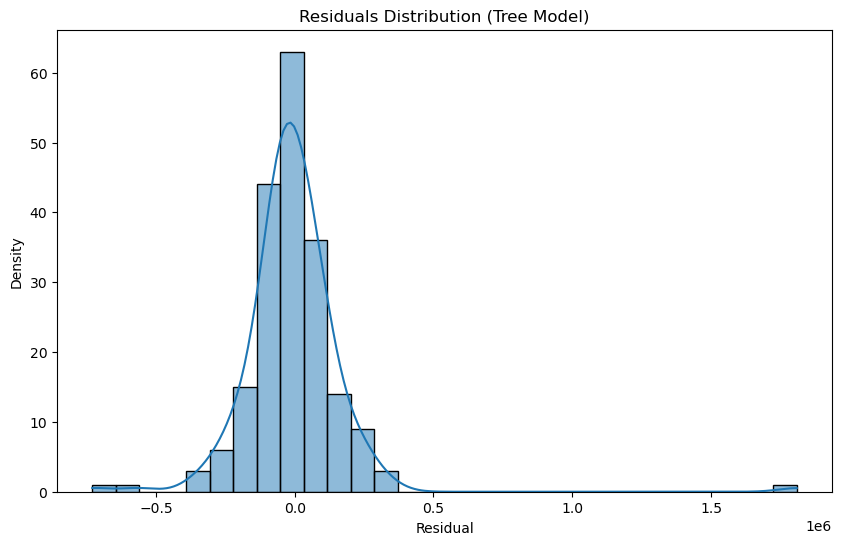

In [20]:
#Plotting the residuals
residuals = y_test - tree_ypred #Definiing the residuals as the difference between the y test and the y predicted

plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True, bins=30) #Using seaborn to plot a histogram of residuals and plotting a KDE plot over it
plt.title("Residuals Distribution (Tree Model)") #Title on the plot
plt.xlabel("Residual") #x label
plt.ylabel("Density") #y label
plt.show()

From the residual plot we see the residuals are evenly distributed and centered around 0.

In [22]:
from sklearn.linear_model import LinearRegression #Importing linear regression from Sci-Kit

linear_model = LinearRegression() #Defining the linear model
linear_model.fit(X_train, y_train) #Fitting the linear model on our train_test_split data

LinearRegression()

In [23]:
linear_y_pred = linear_model.predict(X_test) #Predicing Price using linear regression
linear_r2 = r2_score(y_test, linear_y_pred) #Calculating the R^2 of the model
linear_rmse = np.sqrt(mean_squared_error(y_test, linear_y_pred)) #Calculating the rmse to check error

print(linear_r2)
print(linear_rmse)

0.7453039547134872
200205.30679759712


It seems that the tree performed better on the data based on the higher rmse that the linear model yieled as well as the slightly lower R^2. This is most likely because the relationship between the covariates and prices isn't completely linear. The decision tree can also account for the nuances of how different combinations of variables explain the price discrepancies, and the linear model isn't able to capture it to quite the same degree! 

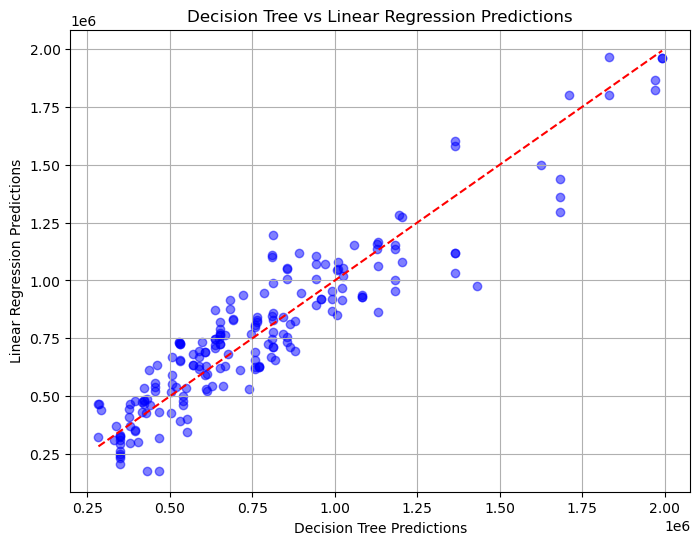

In [25]:
plt.figure(figsize=(8, 6))

plt.scatter(tree_ypred, linear_y_pred, color='blue', alpha=0.5, label='Predictions') #Creating a scatterplot with the linear and tree predictions


plt.plot([min(tree_ypred), max(tree_ypred)], [min(tree_ypred), max(tree_ypred)], color='red', linestyle='--', label='45-degree line') #Adding in a 45 degree line to visualize when the predictions agree
        
plt.xlabel("Decision Tree Predictions") #x label
plt.ylabel("Linear Regression Predictions") #y label
plt.title("Decision Tree vs Linear Regression Predictions") #Title 


plt.grid(True)
plt.show()

From this scatterplot and the 45 degree line representing points that the two models predicted the same, we can see that the linear regression often predicted higher values than the decision tree would. Although the points are pretty equally distributed around the red line, this is a subtle difference I noticed based on the respective transparencies of the points.

**Q3.** This is a case study about classification and regression trees.

1. Load the `Breast Cancer METABRIC.csv` dataset. How many observations and variables does it contain? Print out the first few rows of data.

2.  We'll use a consistent set of feature/explanatory variables. For numeric variables, we'll include `Tumor Size`, `Lymph nodes examined positive`, `Age at Diagnosis`. For categorical variables, we'll include `Tumor Stage`, `Chemotherapy`, and `Cancer Type Detailed`. One-hot-encode the categorical variables and concatenate them with the numeric variables into a feature/covariate matrix, $X$.

3. Let's predict `Overall Survival Status` given the features/covariates $X$. There are 528 missing values, unfortunately: Either drop those rows from your data or add them as a category to predict. Constrain the minimum samples per leaf to 10. Print a dendrogram of the tree. Print a confusion matrix of the algorithm's performance. What is the accuracy? 

4. For your model in part three, compute three statistics:
    - The **true positive rate** or **sensitivity**:
        $$
        TPR = \dfrac{TP}{TP+FN}
        $$
    - The **true negative rate** or **specificity**:
        $$
        TNR = \dfrac{TN}{TN+FP}
        $$
    Does your model tend to perform better with respect to one of these metrics?

5. Let's predict `Overall Survival (Months)` given the features/covariates $X$. Use the train/test split to pick the optimal `min_samples_leaf` value that gives the highest $R^2$ on the test set (it's about 110). What is the $R^2$? Plot the test values against the predicted values. How do you feel about this model for clinical purposes?

In [28]:
data=pd.read_csv("https://raw.githubusercontent.com/gatesz33/trees/refs/heads/main/assignment/data/Breast%20Cancer%20METABRIC.csv") #Loading the data
data.shape #Checking the shape

(2509, 34)

There are 2509 observations and 34 variables in this dataset.

In [30]:
data.head() #Loading in the first few rows

,Patient ID,Age at Diagnosis,Type of Breast Surgery,Cancer Type,Cancer Type Detailed,Cellularity,Chemotherapy,Pam50 + Claudin-low subtype,Cohort,ER status measured by IHC,...,Overall Survival Status,PR Status,Radio Therapy,Relapse Free Status (Months),Relapse Free Status,Sex,3-Gene classifier subtype,Tumor Size,Tumor Stage,Patient's Vital Status
0,MB-0000,75.65,Mastectomy,Breast Cancer,Breast Invasive Ductal Carcinoma,NaN,No,claudin-low,1.0,Positve,...,Living,Negative,Yes,138.65,Not Recurred,Female,ER-/HER2-,22.0,2.0,Living
1,MB-0002,43.19,Breast Conserving,Breast Cancer,Breast Invasive Ductal Carcinoma,High,No,LumA,1.0,Positve,...,Living,Positive,Yes,83.52,Not Recurred,Female,ER+/HER2- High Prolif,10.0,1.0,Living
2,MB-0005,48.87,Mastectomy,Breast Cancer,Breast Invasive Ductal Carcinoma,High,Yes,LumB,1.0,Positve,...,Deceased,Positive,No,151.28,Recurred,Female,NaN,15.0,2.0,Died of Disease
3,MB-0006,47.68,Mastectomy,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,Moderate,Yes,LumB,1.0,Positve,...,Living,Positive,Yes,162.76,Not Recurred,Female,NaN,25.0,2.0,Living
4,MB-0008,76.97,Mastectomy,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,High,Yes,LumB,1.0,Positve,...,Deceased,Positive,Yes,18.55,Recurred,Female,ER+/HER2- High Prolif,40.0,2.0,Died of Disease


In [31]:
data_sub = data[['Tumor Size', 'Lymph nodes examined positive', 'Age at Diagnosis','Tumor Stage', 'Chemotherapy','Cancer Type Detailed','Overall Survival Status']] #Subsetting the columns of interest (x and y variables)
data_oh=pd.get_dummies(data_sub, columns=['Tumor Stage', 'Chemotherapy','Cancer Type Detailed' ], drop_first=False) #One-hot-encoding the categorical variables
data_oh

,Tumor Size,Lymph nodes examined positive,Age at Diagnosis,Overall Survival Status,Tumor Stage_0.0,Tumor Stage_1.0,Tumor Stage_2.0,Tumor Stage_3.0,Tumor Stage_4.0,Chemotherapy_No,Chemotherapy_Yes,Cancer Type Detailed_Breast,Cancer Type Detailed_Breast Angiosarcoma,Cancer Type Detailed_Breast Invasive Ductal Carcinoma,Cancer Type Detailed_Breast Invasive Lobular Carcinoma,Cancer Type Detailed_Breast Invasive Mixed Mucinous Carcinoma,Cancer Type Detailed_Breast Mixed Ductal and Lobular Carcinoma,Cancer Type Detailed_Invasive Breast Carcinoma,Cancer Type Detailed_Metaplastic Breast Cancer
0,22.0,10.0,75.65,Living,False,False,True,False,False,True,False,False,False,True,False,False,False,False,False
1,10.0,0.0,43.19,Living,False,True,False,False,False,True,False,False,False,True,False,False,False,False,False
2,15.0,1.0,48.87,Deceased,False,False,True,False,False,False,True,False,False,True,False,False,False,False,False
3,25.0,3.0,47.68,Living,False,False,True,False,False,False,True,False,False,False,False,False,True,False,False
4,40.0,8.0,76.97,Deceased,False,False,True,False,False,False,True,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2504,27.0,0.0,70.05,NaN,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False
2505,28.0,0.0,63.60,NaN,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False
2506,NaN,0.0,NaN,NaN,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False
2507,NaN,0.0,NaN,NaN,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False


In [32]:
data_clean = data_oh.dropna(subset=['Overall Survival Status']) #Dropping the nans
X = data_clean.drop(columns=['Overall Survival Status']) #Dropping the 'Overall Survival Status' 
y =data_clean['Overall Survival Status'].map({'Living': 0, 'Deceased': 1})

In [33]:
y #Checking y

0       0
1       0
2       1
3       0
4       1
       ..
1980    0
1981    1
1982    1
1983    1
1984    1
Name: Overall Survival Status, Length: 1981, dtype: int64

In [34]:
data_clean.shape

(1981, 19)

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=96) #Train_test_splitting the data

In [36]:
from sklearn.tree import DecisionTreeClassifier #Importing the classifier because we have a binary variable

model_tree = DecisionTreeClassifier(min_samples_leaf=10, random_state=96) #Defining the tree model with our selected number of leaves
model_tree.fit(X_train, y_train) #Fitting the tree on our training data
tree_ypred = model_tree.predict(X_test) #Predicting the prices based on the test covariates

In [37]:
tree_ypred #Checking the predicted values

array([1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0,

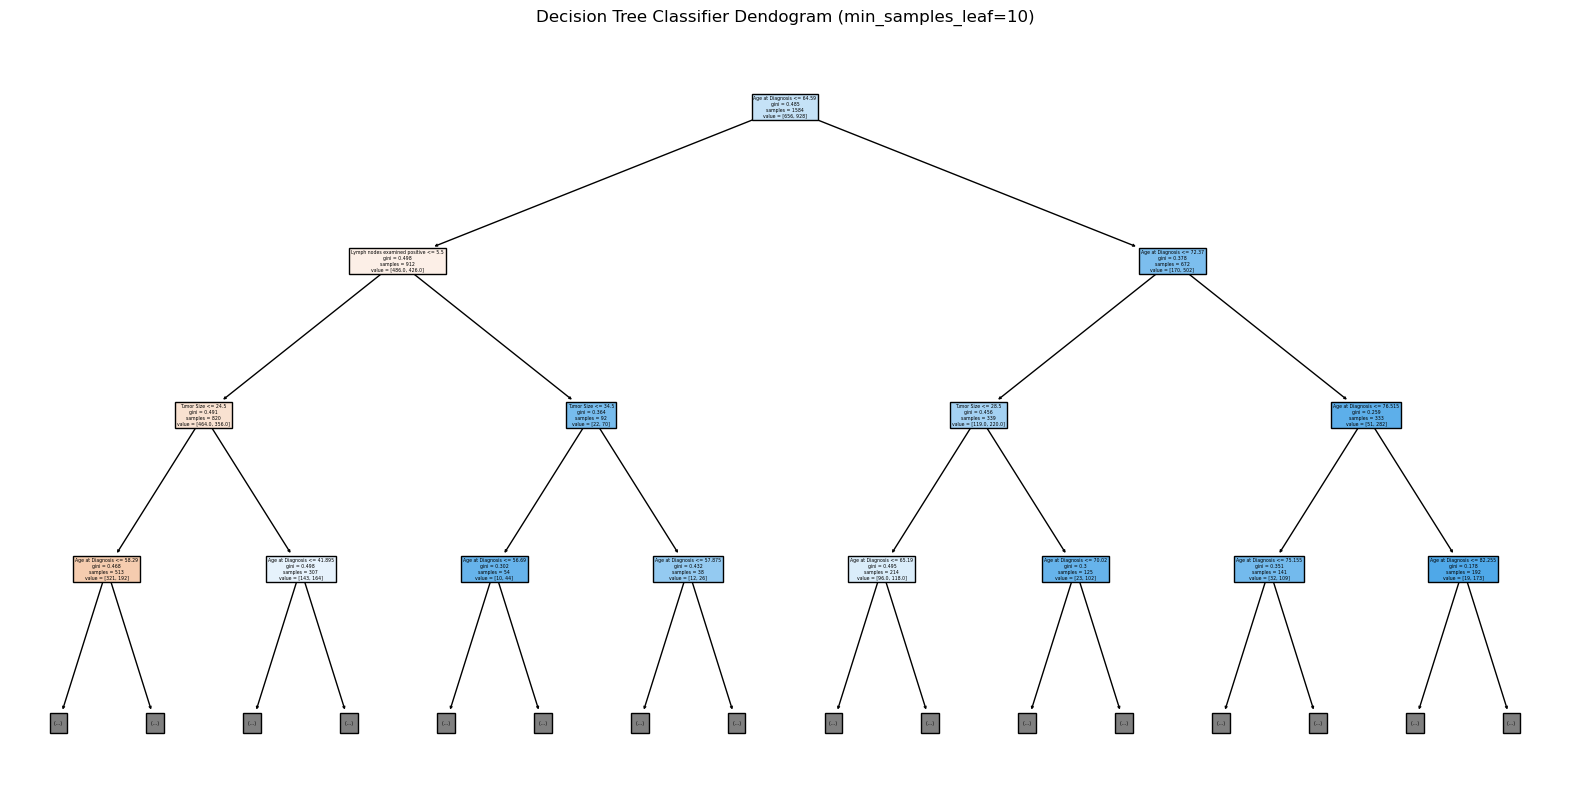

In [38]:
plt.figure(figsize=(20,10)) #Establishing the figure size
plot_tree(model_tree, feature_names=X.columns, filled=True, max_depth=3) #Plotting the dendogram
plt.title("Decision Tree Classifier Dendogram (min_samples_leaf=10)") #Adding a title
plt.show()

In [39]:
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay #Importing tools for the confusion matrix and accuracy score

cross= pd.crosstab(y_test, tree_ypred) #Cross tabulating to create a confusion matrix
acc = (cross.iloc[0,0]+cross.iloc[1,1])/len(y_test) #Calculating the accuracy by adding true predications and diving over total predictions

print(cross)
acc

col_0                     0    1
Overall Survival Status         
0                        92   89
1                        63  153


0.6171284634760705

The accuracy of this tree is 61.7%

In [41]:
TPR = 153/(153+63) #Calculating the true positive rate
print(TPR)

0.7083333333333334


In [42]:
TNR = 92/(92+89) #Calculting the true negative rate
print(TNR)

0.5082872928176796


The model seems to perform better with regard to true positive rate, or sensitivity. This means the model is overpredicting deceased people.

In [76]:
data_sub1 = data[['Tumor Size', 'Lymph nodes examined positive', 'Age at Diagnosis','Tumor Stage', 'Chemotherapy','Cancer Type Detailed','Overall Survival (Months)']] #Subsetting data
data_oh1 =pd.get_dummies(data_sub1, columns=['Tumor Stage', 'Chemotherapy','Cancer Type Detailed' ], drop_first=False) #One-hot-encoding the categorical variables of interest

In [78]:
data_clean = data_oh1.dropna(subset=['Overall Survival (Months)']) #Dropping nan values
X = data_clean.drop(columns=['Overall Survival (Months)']) #Dropping just 'Overall Survival (Months)' to isolate covariates
y = data_clean['Overall Survival (Months)'] #Subset to create y variable

In [92]:
data_clean

,Tumor Size,Lymph nodes examined positive,Age at Diagnosis,Overall Survival (Months),Tumor Stage_0.0,Tumor Stage_1.0,Tumor Stage_2.0,Tumor Stage_3.0,Tumor Stage_4.0,Chemotherapy_No,Chemotherapy_Yes,Cancer Type Detailed_Breast,Cancer Type Detailed_Breast Angiosarcoma,Cancer Type Detailed_Breast Invasive Ductal Carcinoma,Cancer Type Detailed_Breast Invasive Lobular Carcinoma,Cancer Type Detailed_Breast Invasive Mixed Mucinous Carcinoma,Cancer Type Detailed_Breast Mixed Ductal and Lobular Carcinoma,Cancer Type Detailed_Invasive Breast Carcinoma,Cancer Type Detailed_Metaplastic Breast Cancer
0,22.0,10.0,75.65,140.500000,False,False,True,False,False,True,False,False,False,True,False,False,False,False,False
1,10.0,0.0,43.19,84.633333,False,True,False,False,False,True,False,False,False,True,False,False,False,False,False
2,15.0,1.0,48.87,163.700000,False,False,True,False,False,False,True,False,False,True,False,False,False,False,False
3,25.0,3.0,47.68,164.933333,False,False,True,False,False,False,True,False,False,False,False,False,True,False,False
4,40.0,8.0,76.97,41.366667,False,False,True,False,False,False,True,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1980,25.0,1.0,43.10,196.866667,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False
1981,20.0,1.0,42.88,44.733333,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False
1982,25.0,45.0,62.90,175.966667,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False
1983,25.0,12.0,61.16,86.233333,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False


In [80]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=96) #Train_test_split

In [88]:
data_clean['Overall Survival (Months)'].describe() #Checking the data to iterate leaf # over an appropriate interval

count    1981.000000
mean      125.244271
std        76.111772
min         0.000000
25%        60.866667
50%       116.466667
75%       185.133333
max       355.200000
Name: Overall Survival (Months), dtype: float64

In [104]:
for leaf in range(100,200): #Iterating min samples in a leaf from 100 to 200
    model_tree = DecisionTreeRegressor(min_samples_leaf=leaf, random_state=96) #Defining the model
    model_tree.fit(X_train, y_train) #Fitting the model
    y_pred = model_tree.predict(X_test) #Predict y values
    
    r2 = r2_score(y_test, y_pred) #r2_score to check strength of the model
    
    print(f"min_samples_leaf = {leaf}, R Squared = {r2:.4f}")

min_samples_leaf = 100, R Squared = 0.0775
min_samples_leaf = 101, R Squared = 0.0774
min_samples_leaf = 102, R Squared = 0.0773
min_samples_leaf = 103, R Squared = 0.0771
min_samples_leaf = 104, R Squared = 0.0799
min_samples_leaf = 105, R Squared = 0.0799
min_samples_leaf = 106, R Squared = 0.0797
min_samples_leaf = 107, R Squared = 0.0771
min_samples_leaf = 108, R Squared = 0.0778
min_samples_leaf = 109, R Squared = 0.0779
min_samples_leaf = 110, R Squared = 0.0781
min_samples_leaf = 111, R Squared = 0.0795
min_samples_leaf = 112, R Squared = 0.0746
min_samples_leaf = 113, R Squared = 0.0746
min_samples_leaf = 114, R Squared = 0.0770
min_samples_leaf = 115, R Squared = 0.0770
min_samples_leaf = 116, R Squared = 0.0770
min_samples_leaf = 117, R Squared = 0.0776
min_samples_leaf = 118, R Squared = 0.0574
min_samples_leaf = 119, R Squared = 0.0574
min_samples_leaf = 120, R Squared = 0.0548
min_samples_leaf = 121, R Squared = 0.0551
min_samples_leaf = 122, R Squared = 0.0551
min_samples

In [100]:
model_tree = DecisionTreeRegressor(min_samples_leaf=111, random_state=96) #Defining the tree model with our selected number of samples
model_tree.fit(X_train, y_train) #Fitting the tree on our training data
tree_ypred = model_tree.predict(X_test) #Predicting the prices based on the test covariates

r2 = r2_score(y_test, tree_ypred) #Checking R^2
print(r2)

0.07954713415940529

I don't feel great about this model for clinical purposes. It has a low R^2, near 8%, meaning that the model can't really explain the variance in the data. This is different from our previous model predicting life and death that had R^2 closer to 70 percent. Perhaps the covariates don't explain the overall survival months as well as they explain whether they are living or deceased. This could be because how long a person lives is very nuanced and dependent on a variety of other variables.

**Q4.** This is a case study about trees using bond rating data. This is a dataset about bond ratings for different companies, alongside a bunch of business statistics and other data. Companies often have multiple reviews at different dates. We want to predict the bond rating (AAA, AA, A, BBB, BB, B, ..., C, D). Do business fundamentals predict the company's rating?

1. Load the `./data/corporate_ratings.csv` dataset. How many observations and variables does it contain? Print out the first few rows of data.

2.  Plot a histogram of the `ratings` variable. It turns out that the gradations of AAA/AA/A and BBB/BB/B and so on make it hard to get good results with trees. Collapse all AAA/AA/A ratings into just A, and similarly for B and C.

3. Use all of the variables **except** Rating, Date, Name, Symbol, and Rating Agency Name. To include Sector, make a dummy/one-hot-encoded representation and include it in your features/covariates. Collect the relevant variables into a data matrix $X$. 

4. Do a train/test split of the data and use a decision tree classifier to predict the bond rating. Including a min_samples_leaf constraint can raise the accuracy and speed up computation time. Print a confusion matrix and the accuracy of your model. How well do you predict the different bond ratings?

5. If you include the rating agency as a feature/covariate/predictor variable, do the results change? How do you interpret this?

**Q5.** This is a case study about detecting fraud using classification trees. The goal is to predict the `class` variable, which is 0 for non-fraud and 1 for fraud.

1. Open `./data/creditcard_fraud.csv`. Print the number of observations and variables, and look at the first few rows of data. The variables are already normalized and de-identified, and are just called things like `V8` to protect the privacy of the clients.

2. Print a table of counts for the `class` variable and make a histogram. What percentage of transactions are fraudulent?

3. Drop `Time` and make a decision tree classifier to predict fraud. Print a confusion table and compute the accuracy. This is a serious **class imbalance** problem: The minority class is so small that essentially predicting 0's for all cases will achieve an extremely high accuracy. There are over-sampling techniques to deal with this issue, but we don't have time to cover them in class.

4. Imagine that you block every transaction in the test set labelled as fraudulent. How much money is (1) saved that should be saved, (2) lost to fraud anyway, (3) withheld in error from customers? Does implementing this anti-fraud system seem like a good idea, or not? Why?

5. Instead of predicting fraud, predict loss: Multiple the `Class` variable times the `Amount` variable, and call it `Loss`. Predict it using a decision tree regressor (making sure to drop Class, Time, and Loss from the features/covariates/predictors). What $R^2$ and RMSE do you get? Make a scatterplot of the predicted values on the test group versus the actual test values. Do you notice any interesting patterns? How could you use this algorithm to decide which transactions to block, and why?


**Q6.** Show that any decision tree is equivalent to a linear regression on a set of dummy variables that represent the optimal splits in the tree. 

Hint: You can think of CART as partitioning the feature space into a set of sets $\{S_1, S_2, ..., S_K\}$, and then predicting the average for all of the observations in each set $S_k$, $m_k$:
$$
\hat{y}(x) = \sum_{k=1}^K \mathbb{I}\{ x \text{ is in } S_k \} m_k
$$
where $\mathbb{I} \{ P(x,k)\}$ takes the value 1 if the proposition $P(x,k)$ is true and 0 otherwise. Now, doesn't that look like least-squares regression on a set of dummy/one-hot-encoded variables?

Conversely, can any linear regression be represented by a tree?